# Questão 1 e 2

DATASET
-Nome: Contraceptive Method Choice Data Set(Conjunto de dados sobre escolhas de metodos contraceptivos)

-Volume de dados: 1473 amostras.

-Descrição: Este dataset é um subconjunto de um estudo feito na Indonésia sobre a prevalência métodos contraceptivos. O estudo foi feito baseado em mulheres casadas que não estavam grávidas ou não sabiam se estavam grávidas no momento da intrevista.

-Objetivo: O objetivo é prever qual metodo contraceptivo(no use, long-term methods, or short-term methods) é utilizado com base nas características demograficas e socioeconomica da mulher.

-Colunas: 1. Idade da esposa (numerico) 
		2. Nível de educação da Esposa (categorico) 1=low, 2, 3, 4=high 
		3. Nível de educação do marido (categorico) 1=low, 2, 3, 4=high 
		4. Quantidade de filhos (numerico) 
		5. Religião da esposa (binario) 0=Non-Islam, 1=Islam 
		6. Esposa possui trabalho? (binario) 0=Yes, 1=No 
		7. Ocupação do marido (categorico) 1, 2, 3, 4 
		8. padrao de vida index (categorico) 1=low, 2, 3, 4=high 
		9. Exposição a midia (binario) 0=Good, 1=Not good 
		10. Metodo contraceptivo utilizado (class attribute) 1=No-use, 2=Long-term, 3=Short-term

-Campos Nulos: nenhum

-Variaveis Categoricas: Nível de educação da Esposa; Nível de educação do marido; Ocupação do marido; padrao_de_vida index.

In [232]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
df = pd.read_csv('dataset.csv')

for column in df[['educacao_esposa', 'educacao_marido', 'marido_ocupacao', 'padrao_de_vida']]:
    low = df[column] == 1
    regular = df[column] == 2
    good = df[column] == 3
    high = df[column] == 4
    df.loc[low, column] = 'low'
    df.loc[regular, column] = 'regular'
    df.loc[good, column] = 'good'
    df.loc[high, column] = 'high'

df = df.sample(frac=1)
df.head(10)

idade_esposa educacao_esposa educacao_marido  quantidade_filhos  \
1216            31            high            high                  4   
1472            17            good            good                  1   
154             47             low         regular                  4   
199             32         regular            high                  2   
77              45            good            high                  3   
59              49            high            high                  6   
554             28            high            high                  4   
535             24         regular            high                  2   
553             47            high            high                  4   
1007            31            good            high                  2   

      religiao_esposa  eposa_trabalha marido_ocupacao padrao_de_vida  \
1216                1               1            good           good   
1472                1               1         regular           high   
154                 1               1         regular        regular   
199                 1               1            good           good   
77                  1               1             low           high   
59                  1               1             low        regular   
554                 1               1             low           good   
535                 1               1            good           good   
553                 1               0             low           high   
1007                1               1            good           good   

      exposicao_midia  metodo_contraceptivo  
1216                0                     2  
1472                0                     3  
154                 0                     1  
199                 0                     1  
77                  0                     1  
59                  0                     1  
554                 0                     2  
535                 0                     2  
553                 0                     2  
1007                0                     1

In [233]:
df.describe()

idade_esposa  quantidade_filhos  religiao_esposa  eposa_trabalha  \
count   1473.000000        1473.000000      1473.000000     1473.000000   
mean      32.538357           3.261371         0.850645        0.749491   
std        8.227245           2.358549         0.356559        0.433453   
min       16.000000           0.000000         0.000000        0.000000   
25%       26.000000           1.000000         1.000000        0.000000   
50%       32.000000           3.000000         1.000000        1.000000   
75%       39.000000           4.000000         1.000000        1.000000   
max       49.000000          16.000000         1.000000        1.000000   

       exposicao_midia  metodo_contraceptivo  
count      1473.000000           1473.000000  
mean          0.073999              1.919891  
std           0.261858              0.876376  
min           0.000000              1.000000  
25%           0.000000              1.000000  
50%           0.000000              2.000000  
75%           0.000000              3.000000  
max           1.000000              3.000000

In [234]:
df.isnull().sum()

idade_esposa            0
educacao_esposa         0
educacao_marido         0
quantidade_filhos       0
religiao_esposa         0
eposa_trabalha          0
marido_ocupacao         0
padrao_de_vida          0
exposicao_midia         0
metodo_contraceptivo    0
dtype: int64

# Questão 2 análises

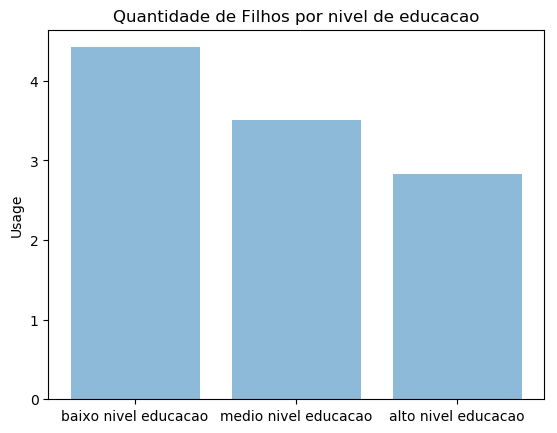

In [235]:
low = df[df['educacao_esposa'] == 'low']
quantidade_low = low['educacao_esposa'].count()
media_low = low['quantidade_filhos'].sum() / quantidade_low

regular = df[df['educacao_esposa'] == 'regular']
quantidade_regular = regular['educacao_esposa'].count()
media_regular = regular['quantidade_filhos'].sum() / quantidade_regular

high = df[df['educacao_esposa'] == 'high']
quantidade_high = high['educacao_esposa'].count()
media_high = high['quantidade_filhos'].sum() / quantidade_high

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('baixo nivel educacao', 'medio nivel educacao', 'alto nivel educacao')
y_pos = np.arange(len(objects))
performance = [media_low, media_regular, media_high]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Quantidade de Filhos por nivel de educacao')
 
plt.show()

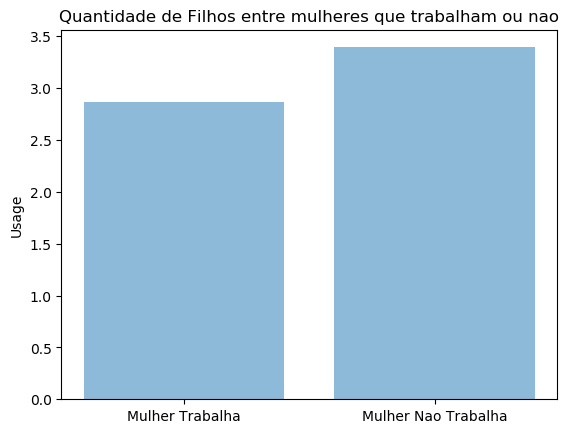

In [236]:
eposa_trabalha = df[df['eposa_trabalha'] == 0]
quantidade_eposa_trabalha = eposa_trabalha['eposa_trabalha'].count()
eposa_nao_trabalha = df[df['eposa_trabalha'] == 1]
quantidade_eposa_nao_trabalha = eposa_nao_trabalha['eposa_trabalha'].count()

media_filhos_esposa_trabalha = eposa_trabalha['quantidade_filhos'].sum() / quantidade_eposa_trabalha 
media_filhos_esposa_nao_trabalha = eposa_nao_trabalha['quantidade_filhos'].sum() / quantidade_eposa_nao_trabalha 


objects = ('Mulher Trabalha', 'Mulher Nao Trabalha')
y_pos = np.arange(len(objects))
performance = [media_filhos_esposa_trabalha, media_filhos_esposa_nao_trabalha]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Quantidade de Filhos entre mulheres que trabalham ou nao')
 
plt.show()

	 Utilização de Metodo Contraceptivo 

Islam:


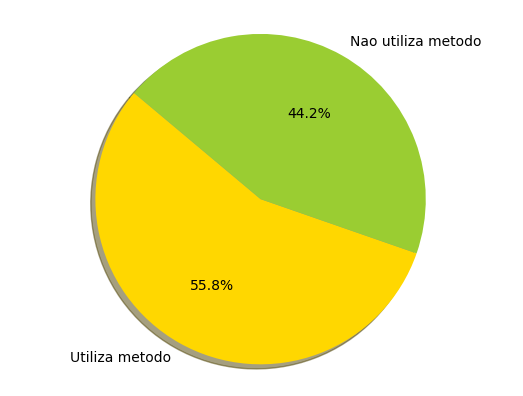

No Islam:


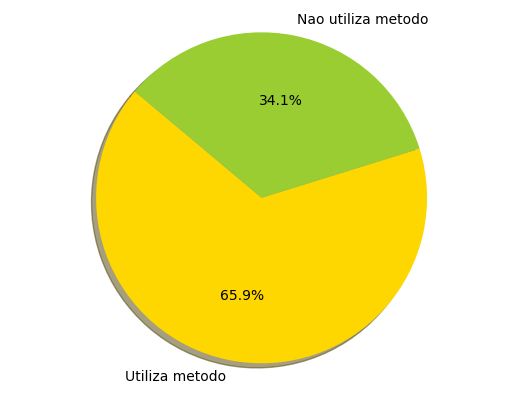

General:


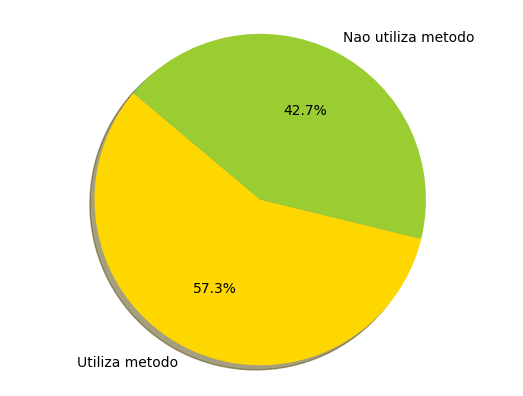

In [237]:
import matplotlib.pyplot as plt

religiao = df[df['religiao_esposa'] == 1]
quantidade_metodo = religiao[religiao['metodo_contraceptivo'] != 1]['metodo_contraceptivo'].count()
quantidade_nao_metodo = religiao[religiao['metodo_contraceptivo'] == 1]['metodo_contraceptivo'].count()

# Data to plot
labels = 'Utiliza metodo', 'Nao utiliza metodo'
sizes = [quantidade_metodo, quantidade_nao_metodo]
colors = ['gold', 'yellowgreen']
# explode = (0.1, 0, 0, 0)  # explode 1st slice
print("\t Utilização de Metodo Contraceptivo \n")
# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
print("Islam:")
plt.axis('equal')
plt.show()

religiao = df[df['religiao_esposa'] == 0]
quantidade_metodo = religiao[religiao['metodo_contraceptivo'] != 1]['metodo_contraceptivo'].count()
quantidade_nao_metodo = religiao[religiao['metodo_contraceptivo'] == 1]['metodo_contraceptivo'].count()

# Data to plot
labels = 'Utiliza metodo', 'Nao utiliza metodo'
sizes = [quantidade_metodo, quantidade_nao_metodo]
colors = ['gold', 'yellowgreen']
# explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
print("No Islam:")
plt.axis('equal')
plt.show()

quantidade_metodo = df[df['metodo_contraceptivo'] != 1]['metodo_contraceptivo'].count()
quantidade_nao_metodo = df[df['metodo_contraceptivo'] == 1]['metodo_contraceptivo'].count()

labels = 'Utiliza metodo', 'Nao utiliza metodo'
sizes = [quantidade_metodo, quantidade_nao_metodo]
colors = ['gold', 'yellowgreen']
# explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
print("General:")
plt.axis('equal')
plt.show()

# Questao 3 listagem de algoritmos e comparações

In [241]:
# MultinomialNB, OneVsOneClassifier, OneVsRestClassifier
x = df.drop(['metodo_contraceptivo'], axis=1)
y = df['metodo_contraceptivo']

x = pd.get_dummies(x)

In [240]:
from scipy.stats import bayes_mvs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

multinomialNB = MultinomialNB()

k = 10
scores = cross_val_score(multinomialNB, x, y, cv = k)

In [238]:
from scipy.stats import bayes_mvs

algoritmo = scores.mean()

In [239]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import warnings

warnings.filterwarnings('ignore')

modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state = 0))

scores = cross_val_score(modeloOneVsOne,x,y,cv = k)
algoritmo1 = scores.mean()

In [242]:
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state = 0))

scores = cross_val_score(modeloOneVsRest,x,y,cv = k)
algoritmo2 = scores.mean()

In [243]:
print(algoritmo, algoritmo1, algoritmo2)

0.4962492141861453 0.4962492141861453 0.46971406847291747


# Questao 4. graficos, matriz confusão e metricas

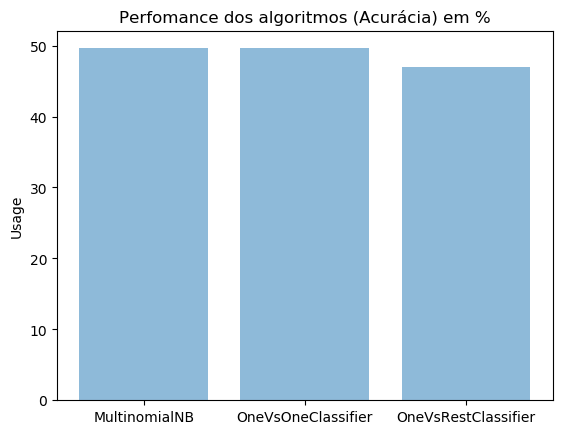

In [244]:
objects = ('MultinomialNB', 'OneVsOneClassifier','OneVsRestClassifier')
y_pos = np.arange(len(objects))
performance = [algoritmo*100, algoritmo1*100,algoritmo2*100]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Perfomance dos algoritmos (Acurácia) em %')
 
plt.show()

In [245]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

multinomialNB.fit(x_treino, y_treino)

y_true = y_teste.values
y_pred = multinomialNB.predict(x_teste)

target_names = ['Não usa', 'Longo termo', 'Médio termo']

print("Modelo Nomial\n",classification_report(y_true, y_pred, target_names=target_names),"\nAcuracia: ", accuracy_score(y_true, y_pred))

modeloOneVsOne.fit(x_treino, y_treino)

y_true = y_teste.values
y_pred = modeloOneVsOne.predict(x_teste)

target_names = ['Não usa', 'Longo termo', 'Médio termo']
print("\nModelo One Vs One\n",classification_report(y_true, y_pred, target_names=target_names),"\nAcuracia: ", accuracy_score(y_true, y_pred))

modeloOneVsRest.fit(x_treino, y_treino)

y_true = y_teste.values
y_pred = modeloOneVsRest.predict(x_teste)

target_names = ['Não usa', 'Longo termo', 'Médio termo']
print("\nModelo One Vs Rest\n",classification_report(y_true, y_pred, target_names=target_names),"\nAcuracia: ", accuracy_score(y_true, y_pred))

Modelo Nomial
               precision    recall  f1-score   support

     Não usa       0.65      0.49      0.56       174
 Longo termo       0.40      0.52      0.45        86
 Médio termo       0.41      0.48      0.44       109

   micro avg       0.49      0.49      0.49       369
   macro avg       0.49      0.50      0.48       369
weighted avg       0.52      0.49      0.50       369
 
Acuracia:  0.4932249322493225

Modelo One Vs One
               precision    recall  f1-score   support

     Não usa       0.72      0.25      0.37       174
 Longo termo       0.40      0.34      0.37        86
 Médio termo       0.35      0.76      0.48       109

   micro avg       0.42      0.42      0.42       369
   macro avg       0.49      0.45      0.40       369
weighted avg       0.54      0.42      0.40       369
 
Acuracia:  0.42005420054200543

Modelo One Vs Rest
               precision    recall  f1-score   support

     Não usa       0.71      0.42      0.53       174
 Longo ter

In [248]:
pd.crosstab(y_teste, multinomialNB.predict(x_teste),
           rownames=['Real'], colnames=['Predito'],
           margins=True)

Predito    1    2    3  All
Real                       
1         85   40   49  174
2         16   45   25   86
3         29   28   52  109
All      130  113  126  369

In [247]:
pd.crosstab(y_teste, modeloOneVsOne.predict(x_teste),
           rownames=['Real'], colnames=['Predito'],
           margins=True)

Predito   1   2    3  All
Real                     
1        43  25  106  174
2         9  29   48   86
3         8  18   83  109
All      60  72  237  369

In [246]:
pd.crosstab(y_teste, modeloOneVsRest.predict(x_teste),
           rownames=['Real'], colnames=['Predito'],
           margins=True)

Predito    1   2    3  All
Real                      
1         73   5   96  174
2         14   7   65   86
3         16   6   87  109
All      103  18  248  369

In [249]:
column = "idade_esposa"
menor_igual20 = df[column] <= 20
maior20menor_igual30 = (df[column] > 20) & (df[column] <=30)
maior30_menor_igual50 = (df[column] > 30) & (df[column] <=50)
maior50 = df[column] > 50
df.loc[menor_igual20, column] = 'menor igual a 20'
df.loc[maior20menor_igual30, column] = 'maior 20 menor igual 30'
df.loc[maior30_menor_igual50, column] = 'maior 30 menor igual 50'
df.loc[maior50, column] = 'maior 50'

df = df.sample(frac=1)
x = df.drop(['metodo_contraceptivo'], axis=1)
x = pd.get_dummies(x)
y = df['metodo_contraceptivo']

In [254]:
multinomialNB = MultinomialNB()
k = 10
scores = cross_val_score(multinomialNB, x, y, cv = k)
algoritmo_versao2 = scores.mean()

In [253]:
modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state = 0))

scores = cross_val_score(modeloOneVsOne,x,y,cv = k)
algoritmo1_versao2 = scores.mean()

In [252]:
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state = 0))

scores = cross_val_score(modeloOneVsRest,x,y,cv = k)
algoritmo2_versao2 = scores.mean()

In [251]:
print(algoritmo_versao2, algoritmo1_versao2, algoritmo2_versao2)

0.4900945284772889 0.4962492141861453 0.5071200279519932


In [250]:
df = pd.read_csv('dataset.csv')

multinomialNB = MultinomialNB()
k = 10
score = cross_val_score(multinomialNB, x, y, cv = k)
algoritmo_integra = scores.mean()

In [257]:
modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state = 0))

scores = cross_val_score(modeloOneVsOne,x,y,cv = k)
algoritmo1_integra = scores.mean()

In [255]:
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state = 0))

scores = cross_val_score(modeloOneVsRest,x,y,cv = k)
algoritmo2_integra = scores.mean()

In [258]:
print(algoritmo_integra, algoritmo1_integra, algoritmo2_integra)

0.46971406847291747 0.5030326152113279 0.5071234419984731


In [256]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Bar(
    x=['MultinomialNB', 'OneVsOneClassifier','OneVsRestClassifier'],
    y=[algoritmo_integra, algoritmo1_integra, algoritmo2_integra],
    name='dataset íntegro'
)
trace1 = go.Bar(
    x=['MultinomialNB v2', 'OneVsOneClassifier v1','OneVsRestClassifier v1'],
    y=[algoritmo, algoritmo1, algoritmo2],
    name='dataset v2'
)

trace2 = go.Bar(
    x=['MultinomialNB v3', 'OneVsOneClassifier v2','OneVsRestClassifier v2'],
    y=[algoritmo_versao2, algoritmo1_versao2, algoritmo2_versao2],
    name='dataset v3'
)


data = [trace,trace1, trace2]
layout = go.Layout(
    barmode='group'
)

plotly.tools.set_credentials_file(username='fabiomsrs', api_key='kaim3eXD0bQjCmwB3v5A')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')